In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from nets.cnn_net import cnn_net

Using TensorFlow backend.


In [2]:
train_path = 'res_still/train'
valid_path = 'res_still/valid'
test_path = 'res_still/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 355 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [3]:
model = cnn_net()

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=355 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=100 // batch_size)

Epoch 1/100
11/11 [==============================] - 16s 1s/step - loss: 1.4839 - acc: 0.3658 - val_loss: 1.0627 - val_acc: 0.4062
Epoch 2/100
11/11 [==============================] - 15s 1s/step - loss: 1.0850 - acc: 0.3721 - val_loss: 1.0499 - val_acc: 0.3824
Epoch 3/100
11/11 [==============================] - 16s 1s/step - loss: 1.0438 - acc: 0.4148 - val_loss: 0.9894 - val_acc: 0.4412
Epoch 4/100
11/11 [==============================] - 14s 1s/step - loss: 0.9419 - acc: 0.4612 - val_loss: 0.8161 - val_acc: 0.3971
Epoch 5/100
11/11 [==============================] - 16s 1s/step - loss: 0.7319 - acc: 0.7131 - val_loss: 0.5071 - val_acc: 0.7708
Epoch 6/100
11/11 [==============================] - 14s 1s/step - loss: 0.5541 - acc: 0.7950 - val_loss: 0.5028 - val_acc: 0.8676
Epoch 7/100
11/11 [==============================] - 30s 3s/step - loss: 0.4413 - acc: 0.8011 - val_loss: 0.3712 - val_acc: 0.8971
Epoch 8/100
11/11 [==============================] - 18s 2s/step - loss: 0.4427 - a

11/11 [==============================] - 17s 2s/step - loss: 0.0954 - acc: 0.9517 - val_loss: 0.0453 - val_acc: 0.9706
Epoch 64/100
11/11 [==============================] - 16s 1s/step - loss: 0.1109 - acc: 0.9402 - val_loss: 0.1836 - val_acc: 0.9559
Epoch 65/100
11/11 [==============================] - 19s 2s/step - loss: 0.0969 - acc: 0.9716 - val_loss: 0.1810 - val_acc: 0.9583
Epoch 66/100
11/11 [==============================] - 16s 1s/step - loss: 0.1666 - acc: 0.9200 - val_loss: 0.0455 - val_acc: 0.9706
Epoch 67/100
11/11 [==============================] - 19s 2s/step - loss: 0.0881 - acc: 0.9602 - val_loss: 0.1579 - val_acc: 0.9706
Epoch 68/100
11/11 [==============================] - 16s 1s/step - loss: 0.0993 - acc: 0.9519 - val_loss: 0.3122 - val_acc: 0.9265
Epoch 69/100
11/11 [==============================] - 15s 1s/step - loss: 0.0938 - acc: 0.9682 - val_loss: 0.2288 - val_acc: 0.9583
Epoch 70/100
11/11 [==============================] - 18s 2s/step - loss: 0.1128 - acc: 0

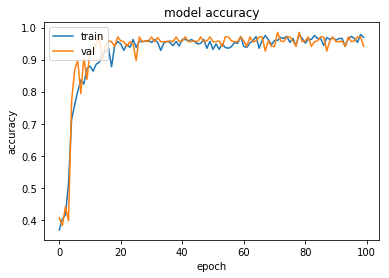

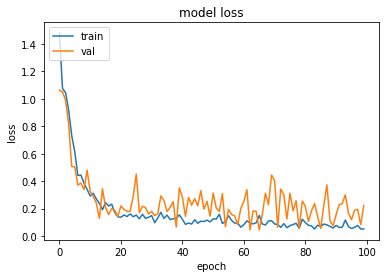

In [5]:
plot_history(history)

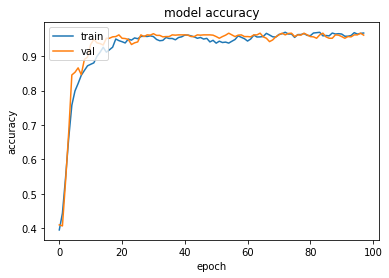

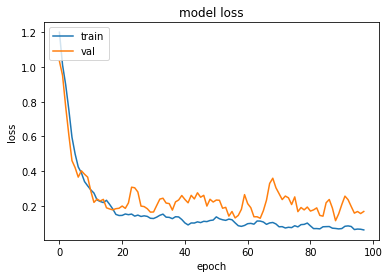

In [6]:
plot_history(history, mean_N=3)

In [11]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 13ms/step


[0.010326920077204704, 1.0]